# Random Variable Carnival

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ali-rivera/DS1001/blob/master/probabilty-lab.ipynb)

[Download the responses .csv from here](https://forms.office.com/pages/designpagev2.aspx?token=d0d2b367e7f64cd692325ed31ce8a3ca&subpage=design&id=x4A0ewc3c0iLd-IWczplrENGrQO5j7NAoe7fkP3fN6VUNjBYMDBaTjBWSTVUVUxGRUI0RkxLUlBLUiQlQCN0PWcu&analysis=true&tab=0)


- Upload the file into the "files" tab on the left hand toolbar.

- Copy the file path (right click > "Copy path")

- Paste the path into the input box in cell 2 when prompted.

In [1]:
## import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in data
data = pd.read_csv(input("Enter the file name:"))
data.head()

Enter the file name:/content/LABS-10_Probability(Form1) (1).csv


,ID,Start time,Completion time,Email,Name,Last modified time,Enter your results from throw 1.,Enter your results from throw 2.,Enter your results from throw 3.,Enter your results from throw 4.,Enter your results from throw 5.,Enter your results from throw 6.,Enter your results from throw 7.,Enter your results from throw 8.,Enter your results from throw 9.,Enter your results from throw 10.
0,4,11/8/24 9:35:55,11/8/24 10:33:39,kqe6rf@virginia.edu,Cameron Berryman,NaN,-2,-2,-2,-2,-2,0,-2,-2,-2,-2
1,5,11/8/24 10:35:01,11/8/24 10:35:41,dnd9bn@virginia.edu,Talia Hoffner,NaN,-2,0,-2,-2,-2,-2,-2,0,-2,-2
2,6,11/8/24 10:35:09,11/8/24 10:35:47,cfh4vw@virginia.edu,Penelope Roberts,NaN,-2,3,-2,-2,0,-2,0,-2,-2,-2
3,7,11/8/24 10:34:00,11/8/24 10:36:37,nfx2tf@virginia.edu,Lauren Ghaemmaghami,NaN,-2,-2,0,1,-2,0,0,0,-2,-2
4,8,11/8/24 10:35:57,11/8/24 10:36:41,mgh4xw@virginia.edu,Tommy Fan,NaN,Blue,Miss,Blue,Miss,Miss,Gold,Miss,Miss,Red,Miss


In [3]:
# Drop the ID, Start time, Completion time, Email, Name, and Last modified time columns

data.drop(columns=["ID","Start time","Completion time","Email","Name","Last modified time"], inplace=True)

In [4]:
# rename columns for easier refernce

data.columns = np.arange(1,11)
data.head()

,1,2,3,4,5,6,7,8,9,10
0,-2,-2,-2,-2,-2,0,-2,-2,-2,-2
1,-2,0,-2,-2,-2,-2,-2,0,-2,-2
2,-2,3,-2,-2,0,-2,0,-2,-2,-2
3,-2,-2,0,1,-2,0,0,0,-2,-2
4,Blue,Miss,Blue,Miss,Miss,Gold,Miss,Miss,Red,Miss


In [5]:
## check that all entries are valid outcomes
vals = [-2, 0, 1, 3,"-2", "0", "1", "3" ]

# remove any row that has unexpected values
# data.drop(data[~data.isin(vals)].stack()[lambda x: x.notnull()].index.get_level_values(0), inplace=True)
data = data[data.apply(lambda row: row.isin(vals).all(), axis=1)]

In [6]:
data = data.astype(int)
data

,1,2,3,4,5,6,7,8,9,10
0,-2,-2,-2,-2,-2,0,-2,-2,-2,-2
1,-2,0,-2,-2,-2,-2,-2,0,-2,-2
2,-2,3,-2,-2,0,-2,0,-2,-2,-2
3,-2,-2,0,1,-2,0,0,0,-2,-2
5,-2,-2,3,0,1,-2,-2,-2,1,-2
6,0,-2,0,-2,-2,3,-2,-2,1,-2
7,1,-2,-2,-2,1,-2,-2,-2,0,-2
8,0,-2,0,-2,-2,3,-2,-2,1,-2
10,0,-2,0,-2,-2,3,-2,-2,1,-2
11,3,-2,0,0,-2,-2,-2,-2,1,-2


In [7]:
# Transpose and reset index (To just get ourcomes)
all_data = data.T.reset_index(drop=True)

In [8]:
# Create a single column with all outcomes
all_data = all_data.stack().reset_index(drop=True)
all_data

,0
0,-2
1,-2
2,-2
3,-2
4,-2
...,...
315,-2
316,-2
317,-2
318,-2


In [9]:
# Calculate the net outcome of each player's 10 games

data['net'] = data.apply(np.sum, axis=1)
data.head()

,1,2,3,4,5,6,7,8,9,10,net
0,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-18
1,-2,0,-2,-2,-2,-2,-2,0,-2,-2,-16
2,-2,3,-2,-2,0,-2,0,-2,-2,-2,-11
3,-2,-2,0,1,-2,0,0,0,-2,-2,-9
5,-2,-2,3,0,1,-2,-2,-2,1,-2,-7


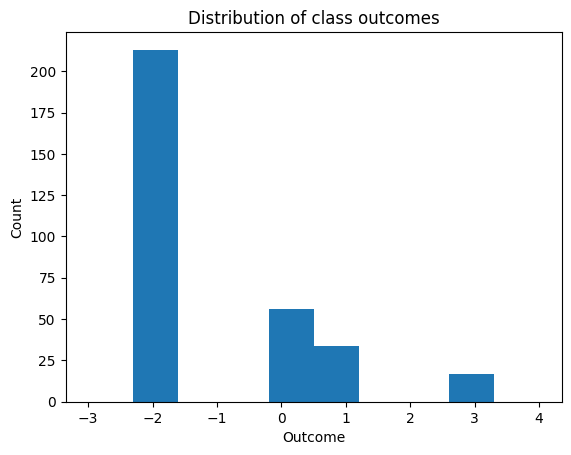

In [10]:
# Plot the pmf of outcomes for the entire class

fig, ax = plt.subplots(1, 1)

plt.hist(all_data, range=(-3,4) )

# Set title
ax.set_title("Distribution of class outcomes")

# adding labels
ax.set_xlabel('Outcome')
ax.set_ylabel('Count')


plt.show()

In [13]:
# Print relevant summary stats

print(f"Net outcome of class: {data.net.sum()} \nAverage outcome per player: {data.net.sum()/(len(data))}\nAverage outcome per throw: {data.net.sum()/(len(data)*10)}\nNumber of players: {len(data)} \nNumber of throws: {len(all_data)}")

Net outcome of class: -341 
Average outcome per player: -10.65625
Average outcome per throw: -1.065625
Number of players: 32 
Number of throws: 320
